In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = load_breast_cancer()
X = data.data                         # 569 x 30
y = data.target                       # 0=malignant, 1=benign
class_names = data.target_names       # ['malignant', 'benign']

df = pd.DataFrame(X, columns=data.feature_names)
print(df.head())


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [3]:
svc = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42))
])
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [4]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary", zero_division=0)
recall = recall_score(y_test, y_pred, average="binary", zero_division=0)
f1 = f1_score(y_test, y_pred, average="binary", zero_division=0)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision (binaria): {precision:.3f}")
print(f"Recall    (binaria): {recall:.3f}")
print(f"F1        (binaria): {f1:.3f}\n")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))


Accuracy : 0.982
Precision (binaria): 0.986
Recall    (binaria): 0.986
F1        (binaria): 0.986

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



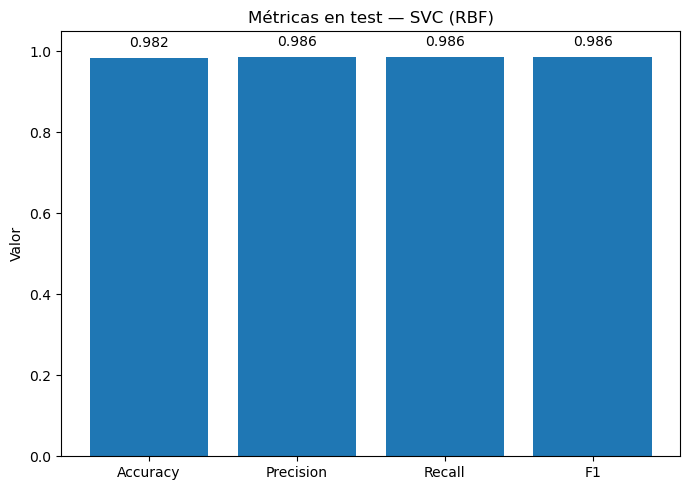

In [5]:
metric_names = ["Accuracy", "Precision", "Recall", "F1"]
metric_vals  = [accuracy, precision, recall, f1]

plt.figure(figsize=(7,5))
bars = plt.bar(metric_names, metric_vals)
plt.ylim(0, 1.05)
plt.title("Métricas en test — SVC (RBF)")
plt.ylabel("Valor")
for rect, val in zip(bars, metric_vals):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height + 0.02, f"{val:.3f}",
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

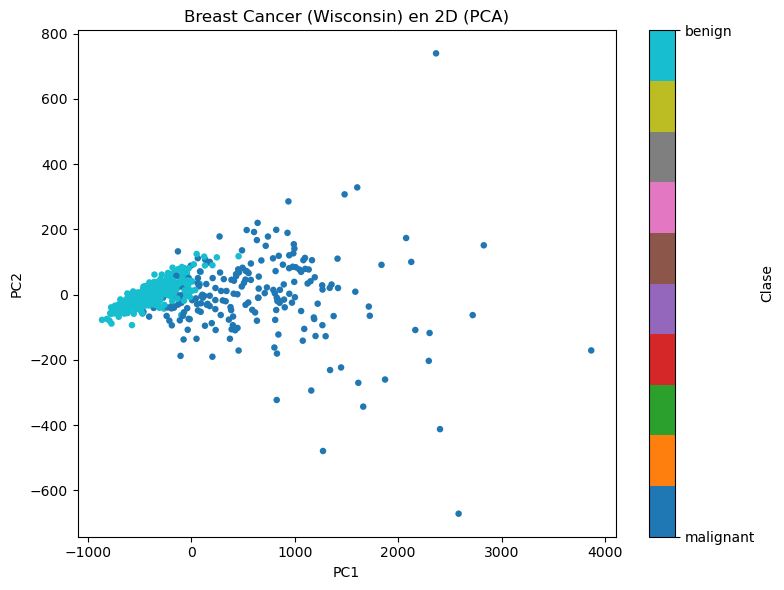

In [6]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", s=22, edgecolor="none")
plt.title("Breast Cancer (Wisconsin) en 2D (PCA)")
plt.xlabel("PC1"); plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=[0,1])
cbar.set_label("Clase")
cbar.set_ticks([0,1])
cbar.set_ticklabels(class_names)
plt.tight_layout()
plt.show()

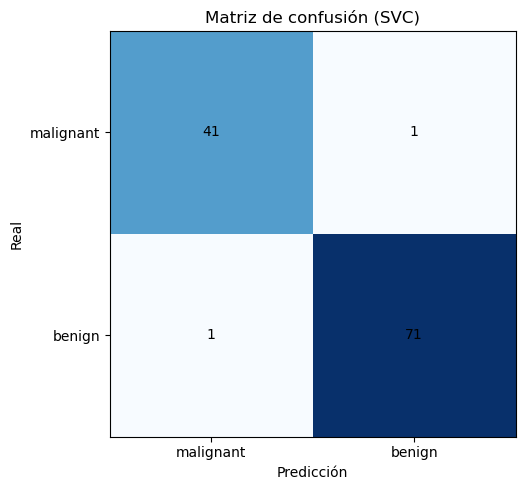

In [7]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Matriz de confusión (SVC)")
plt.xticks(ticks=[0,1], labels=class_names, rotation=0)
plt.yticks(ticks=[0,1], labels=class_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

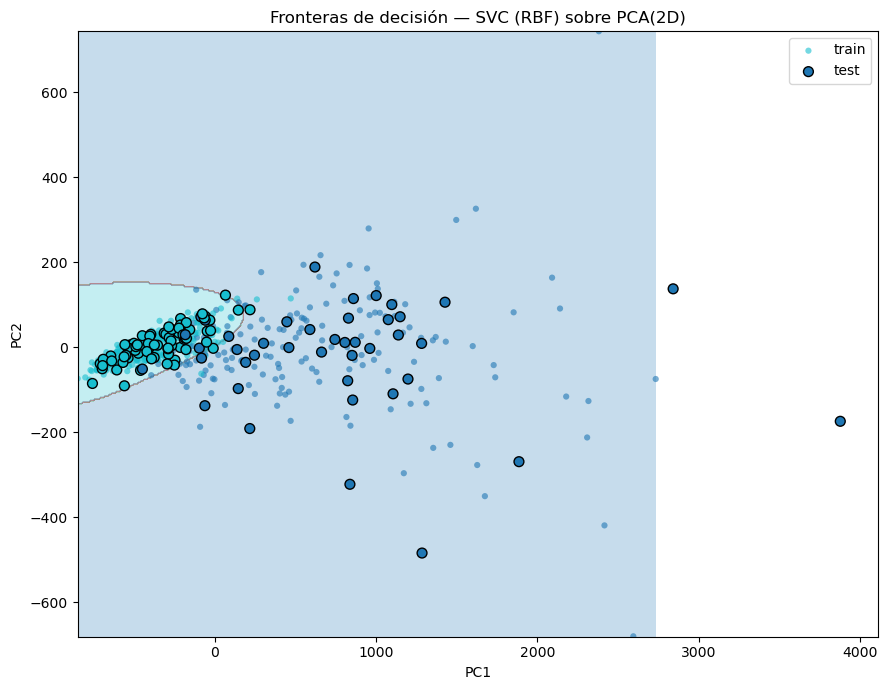

In [8]:
pca2 = PCA(n_components=2, random_state=42)
X_train_pca = pca2.fit_transform(X_train)
X_test_pca  = pca2.transform(X_test)

svc2d = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42))
])
svc2d.fit(X_train_pca, y_train)

# malla en el plano PCA
x_min, x_max = X_train_pca[:,0].min()-1, X_train_pca[:,0].max()+1
y_min, y_max = X_train_pca[:,1].min()-1, X_train_pca[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
Z = svc2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.25, cmap="tab10")
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="tab10",
            s=20, edgecolor="none", alpha=0.6, label="train")
plt.scatter(X_test_pca[:,0],  X_test_pca[:,1],  c=y_test,  cmap="tab10",
            s=50, edgecolor="k",   label="test")
plt.title("Fronteras de decisión — SVC (RBF) sobre PCA(2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()
